In [14]:
import pandas as pd

In [19]:
df = pd.read_csv("../data/input/AAPL.csv")

In [20]:
df

,Date,Adj Close
0,2023-03-22,156.254211
1,2023-03-23,157.343216
2,2023-03-24,158.650055
3,2023-03-27,156.699738
4,2023-03-28,156.076004
...,...,...
497,2025-03-17,214.000000
498,2025-03-18,212.690002
499,2025-03-19,215.240005
500,2025-03-20,214.100006


In [21]:
df.to_dict(orient='records')

[{'Date': '2023-03-22', 'Adj Close': 156.25421142578125},
 {'Date': '2023-03-23', 'Adj Close': 157.3432159423828},
 {'Date': '2023-03-24', 'Adj Close': 158.65005493164062},
 {'Date': '2023-03-27', 'Adj Close': 156.69973754882812},
 {'Date': '2023-03-28', 'Adj Close': 156.0760040283203},
 {'Date': '2023-03-29', 'Adj Close': 159.1648712158203},
 {'Date': '2023-03-30', 'Adj Close': 160.73899841308594},
 {'Date': '2023-03-31', 'Adj Close': 163.25363159179688},
 {'Date': '2023-04-03', 'Adj Close': 164.5109405517578},
 {'Date': '2023-04-04', 'Adj Close': 163.97633361816406},
 {'Date': '2023-04-05', 'Adj Close': 162.12501525878906},
 {'Date': '2023-04-06', 'Adj Close': 163.01602172851562},
 {'Date': '2023-04-10', 'Adj Close': 160.4122772216797},
 {'Date': '2023-04-11', 'Adj Close': 159.19456481933594},
 {'Date': '2023-04-12', 'Adj Close': 158.50157165527344},
 {'Date': '2023-04-13', 'Adj Close': 163.9070281982422},
 {'Date': '2023-04-14', 'Adj Close': 163.56053161621094},
 {'Date': '2023-04-1

In [13]:
from river import datasets

for x, y in datasets.AirlinePassengers():
    print(x, y)

{'month': datetime.datetime(1949, 1, 1, 0, 0)} 112
{'month': datetime.datetime(1949, 2, 1, 0, 0)} 118
{'month': datetime.datetime(1949, 3, 1, 0, 0)} 132
{'month': datetime.datetime(1949, 4, 1, 0, 0)} 129
{'month': datetime.datetime(1949, 5, 1, 0, 0)} 121
{'month': datetime.datetime(1949, 6, 1, 0, 0)} 135
{'month': datetime.datetime(1949, 7, 1, 0, 0)} 148
{'month': datetime.datetime(1949, 8, 1, 0, 0)} 148
{'month': datetime.datetime(1949, 9, 1, 0, 0)} 136
{'month': datetime.datetime(1949, 10, 1, 0, 0)} 119
{'month': datetime.datetime(1949, 11, 1, 0, 0)} 104
{'month': datetime.datetime(1949, 12, 1, 0, 0)} 118
{'month': datetime.datetime(1950, 1, 1, 0, 0)} 115
{'month': datetime.datetime(1950, 2, 1, 0, 0)} 126
{'month': datetime.datetime(1950, 3, 1, 0, 0)} 141
{'month': datetime.datetime(1950, 4, 1, 0, 0)} 135
{'month': datetime.datetime(1950, 5, 1, 0, 0)} 125
{'month': datetime.datetime(1950, 6, 1, 0, 0)} 149
{'month': datetime.datetime(1950, 7, 1, 0, 0)} 170
{'month': datetime.datetime(

In [3]:
from river import compose
from river import linear_model
from river import preprocessing


def get_ordinal_date(x):
    return {'ordinal_date': x['month'].toordinal()}


model = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression())
)

In [4]:
from river import metrics
from river import utils
import matplotlib.pyplot as plt


def evaluate_model(model): 

    metric = utils.Rolling(metrics.MAE(), 12)

    dates = []
    y_trues = []
    y_preds = []

    for x, y in datasets.AirlinePassengers():

        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x, y)

        # Update the error metric
        metric.update(y, y_pred)

        # Store the true value and the prediction
        dates.append(x['month'])
        y_trues.append(y)
        y_preds.append(y_pred)

    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.75)
    ax.plot(dates, y_trues, lw=3, color='#2ecc71', alpha=0.8, label='Ground truth')
    ax.plot(dates, y_preds, lw=3, color='#e74c3c', alpha=0.8, label='Prediction')
    ax.legend()
    ax.set_title(metric)

Matplotlib is building the font cache; this may take a moment.


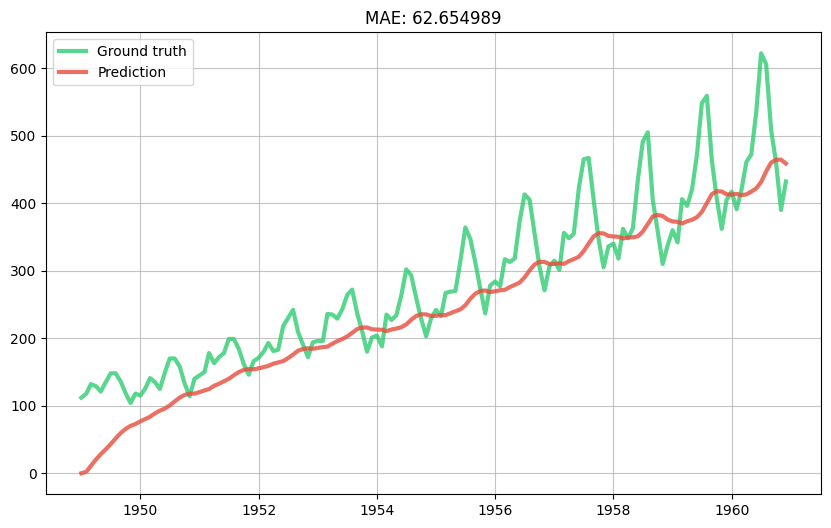

In [5]:
evaluate_model(model)

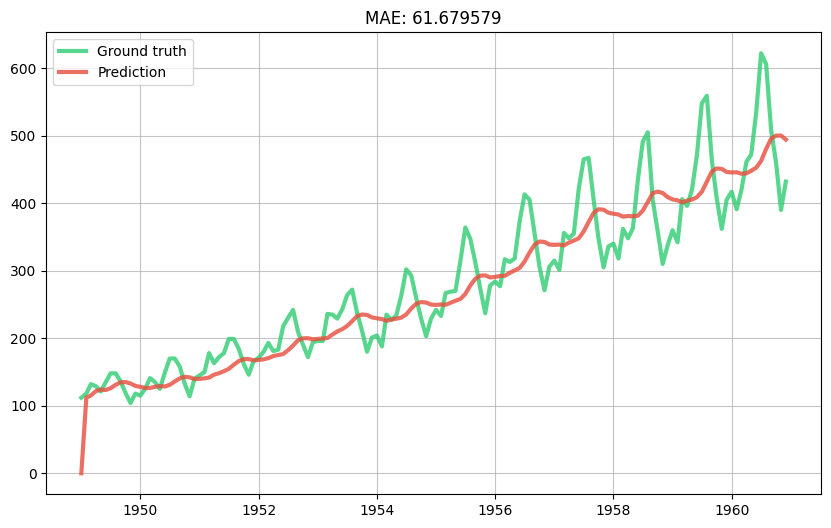

In [6]:
from river import stats


model = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(intercept_lr=0)),
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model)

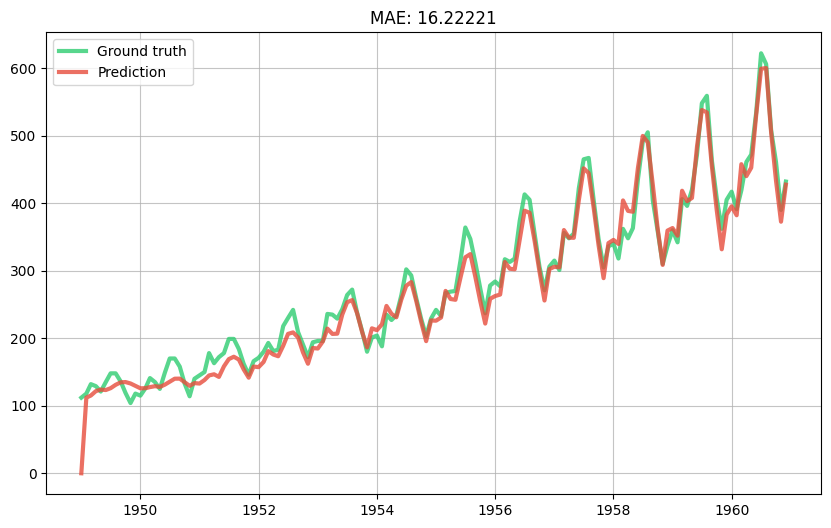

In [7]:
import calendar


def get_month(x):
    return {
        calendar.month_name[month]: month == x['month'].month
        for month in range(1, 13)
    }


model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
        ('month', compose.FuncTransformer(get_month)),
    )),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(intercept_lr=0))
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model)

In [8]:
model.regressor['lin_reg'].weights

{'January': -0.13808091575141299,
 'February': -0.18716063793638954,
 'March': -0.026469206216021102,
 'April': -0.03500685108350436,
 'May': -0.013638742192777328,
 'June': 0.16194267303548826,
 'July': 0.31995865445067634,
 'August': 0.2810396556938982,
 'September': 0.03834350518076595,
 'October': -0.11655850082390988,
 'November': -0.2663497734491209,
 'December': -0.15396048501165746,
 'ordinal_date': 1.0234863735122575}

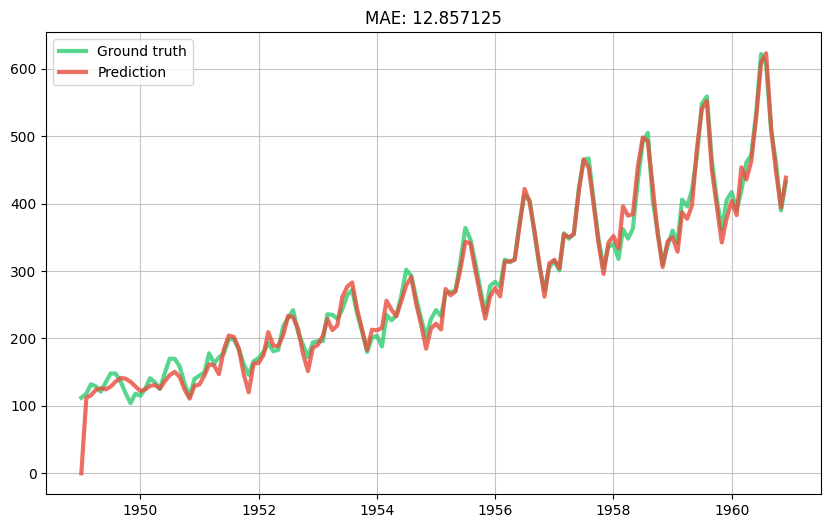

In [9]:
from river import optim

model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
        ('month', compose.FuncTransformer(get_month)),
    )),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(
        intercept_lr=0,
        optimizer=optim.SGD(0.03)
    ))
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model)

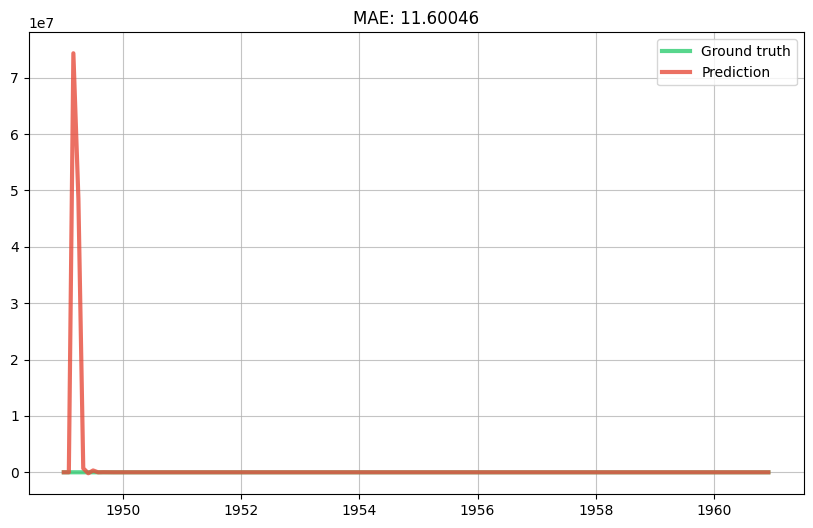

In [10]:
import math

def get_month_distances(x):
    return {
        calendar.month_name[month]: math.exp(-(x['month'].month - month) ** 2)
        for month in range(1, 13)
    }


model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
        ('month_distances', compose.FuncTransformer(get_month_distances)),
    )),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(
        intercept_lr=0,
        optimizer=optim.SGD(0.03)
    ))
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model)

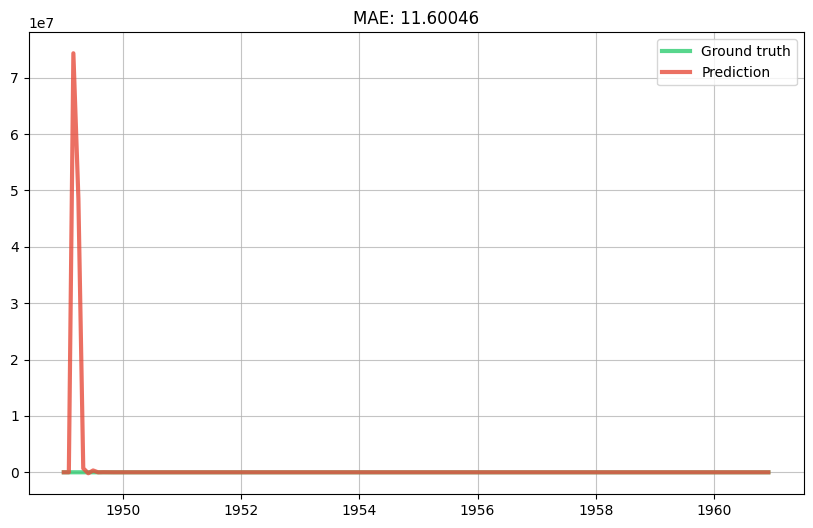

In [11]:
extract_features = compose.TransformerUnion(get_ordinal_date, get_month_distances)

scale = preprocessing.StandardScaler()

learn = linear_model.LinearRegression(
    intercept_lr=0,
    optimizer=optim.SGD(0.03)
)

model = extract_features | scale | learn
model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model)

In [12]:
model

TargetStandardScaler (
  regressor=Pipeline (
    steps=OrderedDict([('TransformerUnion', TransformerUnion (
  FuncTransformer (
    func="get_ordinal_date"
  ),
  FuncTransformer (
    func="get_month_distances"
  )
)), ('StandardScaler', StandardScaler (
  with_std=True
)), ('LinearRegression', LinearRegression (
  optimizer=SGD (
    lr=Constant (
      learning_rate=0.03
    )
  )
  loss=Squared ()
  l2=0.
  l1=0.
  intercept_init=0.
  intercept_lr=Constant (
    learning_rate=0
  )
  clip_gradient=1e+12
  initializer=Zeros ()
))])
  )
)